# Exercise Session 1

Welcome to Knowledge and Data Engineering Course!

## RDFlib

• A Python library for working with RDF and SPARQL

• Open source library

• The library is available on Github: https://github.com/RDFLib/rdflib

### Installation

• You need Python 2.7 or above installed on your machine

• Documentation
https://rdflib.readthedocs.io/en/stable/gettingstarted.html

In [ ]:
!pip install rdflib

### 1- Creating an RDF graph

In [ ]:
# Creating a graph
import rdflib
g = rdflib.Graph() 

### 2- Creating Resources (RDF URIs), literals (String, Date, etc) and RDF vocabulary terms

In [ ]:
from rdflib import Graph, Literal, RDF, URIRef

In [ ]:
# URIs
infokmt = URIRef("http://example.org/Resource/KnowledgeAndDataEngineering")
utrecht = URIRef("http://example.org/Resource/Utrecht")

In [ ]:
# Literals
infokmtLiteral = Literal(" Knowledge and Data Engineering ")
infokmtLiteralEN = Literal("Knowledge and Data Engineering", lang="en")
netherlandsLiteralNL = Literal("Nederland”, lang=”nl")
from rdflib.namespace import DC, DCTERMS, DOAP, FOAF, SKOS, OWL, RDF, RDFS, VOID, XMLNS, XSD
netherlandsLiteralNL = Literal("Nederland", datatype=XSD.string)

### 3- Namespaces


In [ ]:
# Defining namespaces
from rdflib.namespace import Namespace
terms = Namespace("http://example.org/terms/")
ex = Namespace("http://example.org/Resouce/")
# Defining resources in a give namespace
terms["offeredat"]
ex["KnowledgeAndDataEngineering"]

### 4- Serializing RDF
• Several serializations possible: Turtle, RDF/XML, N3, TriG, Trix and JSON-LD

Turtle:
``print(g.serialize(format="turtle"))``
(Some versions: ``print(g.serialize(format="turtle").decode("utf-8"))``)

N3:
``print(g.serialize(format="n3"))``
(Some versions: ``print(g.serialize(format="n3").decode("utf-8"))``)

### 5- Reading RDF

Reading an RDF graph from a file and counting the number of triples:

Create a file called examplegraph.txt contains the following graph:

    @prefix : <http://example.org/> .

    :Peter :marriedTo :Julia . 
    :Peter :fatherOf :Caludia . 
    :Julia :motherOf :Caludia . 

In [ ]:
g = Graph()
g.parse("examplegraph.txt", format='turtle')
print(g.serialize(format="turtle"))

count = 0
for s,p,o in g:
    count += 1 
print(count)

Reading from a remote RDF repository:

Extract triples from the DBPedia knowledge graph 

In [ ]:
g = Graph()
g.parse("http://dbpedia.org/resource/Utrecht")
print(g.serialize(format="turtle"))

count = 0
for s,p,o in g:
    count += 1 
print(count)

# Exercises

### 1- Which of the following is a valid RDF triple?
a) :bart :hates _:x .

b) :bart _:x :lisa .

c) “Bart” :name :bart .


d) :bart “loves” :lisa .

### 2- Transform the following RDF graph into Turtle syntax

![Figure](https://git.science.uu.nl/islak001/images/-/raw/master/rdf_graph.png)

Figure based on S. Hartling

### 3- Transform the following sentences into RDF triples.
1. Knowledge and Data Engineering is offered at Utrecht University.
2. Lisa knows someone who is expert in machine learning.
3. The web is created by Sir. Tim Berners-Lee.
4. TimBL created the web in 1989 in Geneva, Switzerland.
5. Homer Simpson is the husband of Marge Simpson.
6. Homer was born on January 1st 1989.
7. Homer loves Bart, Lisa and Meggie.
8. Homer loves Lisa, Bart and Meggie (in that order).
9. Homer loves Lisa or Bart or Maggie.
10. Homer loves only Lisa, Bart and Maggie. 
11. Lisa saw Eric eating ice cream. 

### 4- Model the data represented in the following paragraph as an RDF graph (in Turtle syntax).

Howard Phillips Lovecraft (H.P. Lovecraft) was an American writer of weird fiction and horror fiction. He was born August 20, 1890 in Providence, Rhode Island, and died on March 15, 1937 of cancer, aged 46. Among his most notable works are (in no particular order) The Rats in the Walls, The Call of Cthulhu and At the Mountains of Madness. The Call of Cthulhu (La Llamada de Cthulhu in Spanish, L’Appel de Cthulhu in French) is a short horror story written in 1926 that was first published in the pulp magazine Weird Tales in February 1928. It consists of three chapters: the first is The Horror in Clay; the second is The Tale of Inspector Legrasse; the third is The Madness from the Sea. Howard was the only child of Winfield and Sarah Lovecraft. He married Sonia Greene in 1924; they did not have any children.

### Coding part

Coding example for Sentence 1 from **Task 3**

In [ ]:
from rdflib import Graph, URIRef, Literal

g = Graph()

subject = URIRef("http://example.org/Resouce/KnowledgeAndDataEngineering")
predicate = URIRef("http://example.org/terms/offeredAt")
object1 = URIRef("http://example.org/Resouce/UtrechtUniversity")

g.add((subject, predicate, object1)) 

predicate2 = URIRef("http://example.org/terms/hasTitle")
object2 = Literal("Knowledge and Data Engineering")

g.add((subject, predicate2, object2))

print(g.serialize(format="turtle"))

Using namespaces

In [ ]:
from rdflib import Graph, URIRef, Literal, Namespace

terms = Namespace("http://example.org/terms/")
resources = Namespace("http://example.org/Resouce/")


subject3 = resources["KnowledgeAndDataEngineering"]
predicate3 = terms["offeredAt"]
object3 = resources["UtrechtUniversity"]
# Knowledge and Data Engineering has title "Knowledge and Data Engineering"
predicate4 = terms["hasTitle"]
object4 = Literal("Knowledge and Data Engineering")


g4 = Graph()

g4.bind("terms", terms)
g4.bind("ex", resources)

g4.add((subject3, predicate3, object3))
g4.add((subject3, predicate4, object4))

print(g4.serialize(format="turtle"))

### 5 - Write the code for Sentence 2 using namespaces

###  6 - Create RDF data from Wikipedia infoboxes 

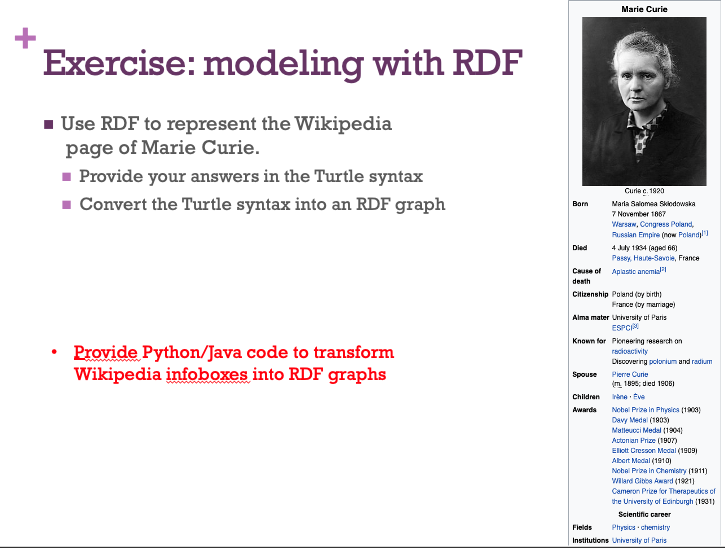